# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
The dataset provided has 7 column and 1500 row. 
Columns:
1. owned: the data match the description provided. There is no null or illogical data in this column.
2. make_model: the data match the description provided. There is no null or illogical data in this column.
3. review_month: the column contains not only short name of month but also day date. There are 750 data that contains day date. I extract only short name of the month and no other abnormalities found.
4. web_browser: there are 150 null values, replaced with Unknown
5. reviewer_age: imputed 105 '-' with mean.
6. primary_use: the data match the description provided. There is no null or illogical data in this column.
7. value_for_money: all data contains '/10' in this column. Removed '/10' and change data type to int.
8. overall_rating: the data match the description provided. There is no null, illogical or out of boundary data in this column.

In [1]:
#Import library
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

#Import dataset
df = pd.read_csv('electric_bike_ratings_2212.csv')
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


In [3]:
#Check column: owned
df.owned.value_counts(dropna=False)

1    890
0    610
Name: owned, dtype: int64

In [4]:
#Check column: make_model
df.make_model.value_counts(dropna=False)

Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64

In [5]:
#Check column: review_month
df.review_month.value_counts(dropna=False)

Sep       73
Mar       72
May       68
Nov       67
Apr       65
          ..
10-Jul     1
18-Aug     1
14-Apr     1
20-Sep     1
06-Aug     1
Name: review_month, Length: 332, dtype: int64

In [6]:
#Count illogical data
df.review_month.str.match(r'[A-Za-z]+').value_counts()

True     750
False    750
Name: review_month, dtype: int64

In [7]:
#Clean column: review_month
df_cleaning_revmonth = df.copy()
df_cleaning_revmonth['review_month'] = df_cleaning_revmonth['review_month'].str.extract(r'([A-Za-z]+)')
df_cleaning_revmonth['review_month'].unique()

array(['Oct', 'Jun', 'Nov', 'Sep', 'Aug', 'Mar', 'Jul', 'Apr', 'Dec',
       'Feb', 'Jan', 'May'], dtype=object)

In [8]:
#Return the cleaned data to original dataframe
df = df_cleaning_revmonth.copy()

#Check column: web_browser
df.web_browser.value_counts(dropna=False)

Chrome     698
IE         239
Firefox    233
NaN        150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64

In [9]:
#Clean column: web_browser
df.web_browser.fillna('Unknown', inplace=True)

In [10]:
#Check column: reviewer_age
df.reviewer_age.unique()

array(['23', '24', '28', '41', '33', '47', '20', '32', '35', '22', '29',
       '39', '42', '36', '40', '27', '48', '34', '16', '21', '25', '30',
       '-', '46', '37', '31', '17', '44', '26', '38', '49', '50', '45',
       '19', '43', '18'], dtype=object)

In [11]:
#Count '-' in reviewer_age
df.reviewer_age.str.match('-').value_counts()

False    1395
True      105
Name: reviewer_age, dtype: int64

In [12]:
#Clean column: reviewer_age
df_cleaning_reviewer_age = df.copy()

df_cleaning_reviewer_age['reviewer_age'] = pd.to_numeric(df_cleaning_reviewer_age['reviewer_age'], errors='coerce')

df_cleaning_reviewer_age['reviewer_age'].fillna(round(np.mean(df_cleaning_reviewer_age['reviewer_age']),0),inplace=True)

df_cleaning_reviewer_age['reviewer_age'] = df_cleaning_reviewer_age['reviewer_age'].astype('int')

df_cleaning_reviewer_age['reviewer_age'].unique()

array([23, 24, 28, 41, 33, 47, 20, 32, 35, 22, 29, 39, 42, 36, 40, 27, 48,
       34, 16, 21, 25, 30, 46, 37, 31, 17, 44, 26, 38, 49, 50, 45, 19, 43,
       18])

In [13]:
#Return the cleaned data to original df
df = df_cleaning_reviewer_age.copy()

#Check column: primary_use
df.primary_use.value_counts()

Commuting    1095
Leisure       405
Name: primary_use, dtype: int64

In [14]:
#Check column: value_for_money
df.value_for_money.value_counts()

5/10     387
6/10     323
4/10     315
3/10     183
7/10     167
2/10      53
8/10      52
1/10      11
9/10       8
10/10      1
Name: value_for_money, dtype: int64

In [15]:
#Clean column: value_for_money
df['value_for_money'] = df['value_for_money'].str.replace('/10', '').astype('int')

df['value_for_money'].value_counts()

5     387
6     323
4     315
3     183
7     167
2      53
8      52
1      11
9       8
10      1
Name: value_for_money, dtype: int64

In [16]:
#Check column: overall rating
df.overall_rating.value_counts()

18.62    10
18.63    10
18.77    10
18.88    10
18.51    10
         ..
17.71     1
17.15     1
17.93     1
20.20     1
19.79     1
Name: overall_rating, Length: 583, dtype: int64

In [17]:
df.overall_rating.describe()

count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64

## Task 2
1.  890 people who posted review owned moped and the other 690 didn't own moped.
2.  In make_model category, Niellah-Eyden, Lunna-Keetra and Hoang-Eyden aren't balanced. Most people who review Niellah-Eyden and Hoang-Eyden owned Niellah-Eyden, while peole who review Lunna Keetra mostly didn't own it.
3.  review_month category is balanced in terms of owned count. Most people made the review in September.
4.  Most people wrote the review using Chrome. The owned count is quite balanced in this category.
5.  Most reviewer age is 33. Some age has imbalanced owned count.
6.  Most reviewer report the bike used for commuting. The data is balanced in this category.
7.  Most reviewer give rating 5 to the value_for_money. Most people giving higher rating owned the moped.
8.  Most people who gave higher overall rating owned the bike. The data is imbalanced.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   int64  
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   int64  
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [19]:
#Create function
def count_plot(df, x, hue=None):
    """
    Create a count plot using Seaborn.

    Parameters:
        df (DataFrame): The input DataFrame.
        x (str): The column name for the x-axis.
        hue (str, optional): The column name for the hue variable (default: None).
    """
    #Create count plot
    plot = sns.countplot(data=df, x=x, hue=hue)
    
            
    #Title and label
    plt.title(f'Count Plot of {x} with hue of {hue}')
    plt.xticks(rotation=45)

    # Annotate the count values
    for i in plot.patches:
        if i.get_height() > 0:
            plot.annotate(str(round(i.get_height())), xy=(i.get_x() + i.get_width()/2, i.get_height()), ha='center')

    # Show the plot
    plt.show()

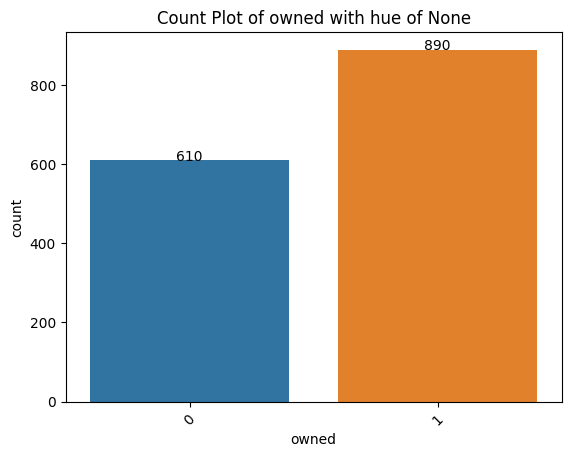

In [20]:
count_plot(df, 'owned')

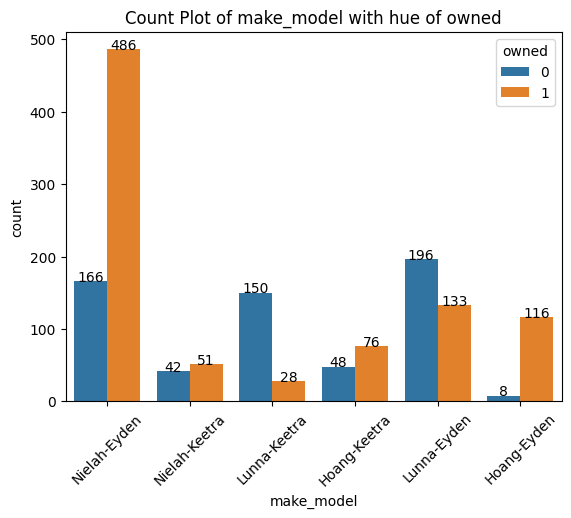

In [21]:
count_plot(df, 'make_model', 'owned')

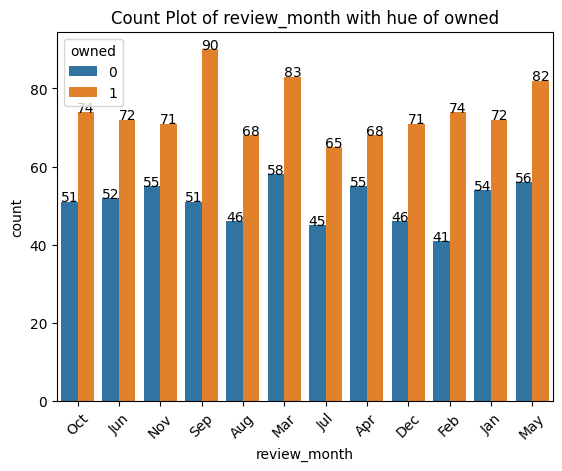

In [22]:
count_plot(df, 'review_month', 'owned')

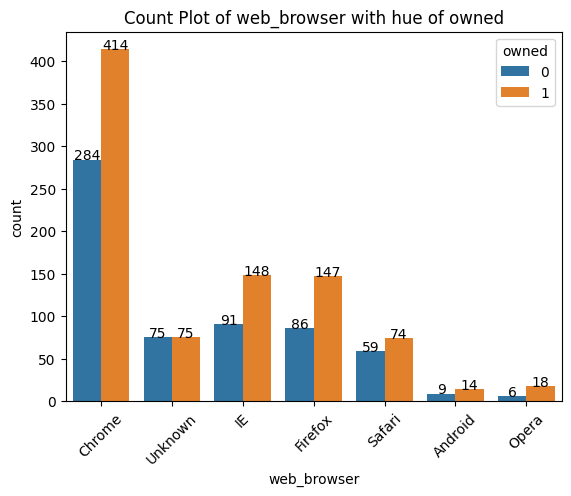

In [23]:
count_plot(df, 'web_browser', 'owned')

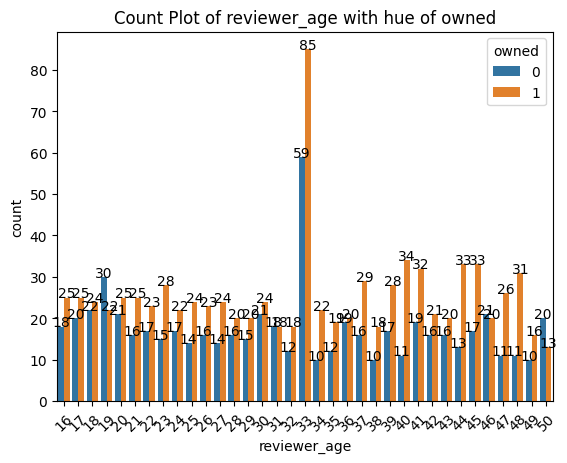

In [24]:
count_plot(df, 'reviewer_age', 'owned')

In [25]:
def hist_plot(df, x, hue=None):
    """
    Create a histogram using Seaborn.

    Parameters:
        df (DataFrame): The input DataFrame.
        x (str): The column name for the x-axis.
        hue (str, optional): The column name for the hue variable (default: None).
    """
    #Create kde plot
    plot = sns.histplot(data=df, x=x, hue=hue, alpha=0.5)
       
    #Title and label
    plt.title(f'Count Plot of {x} with hue of {hue}')
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

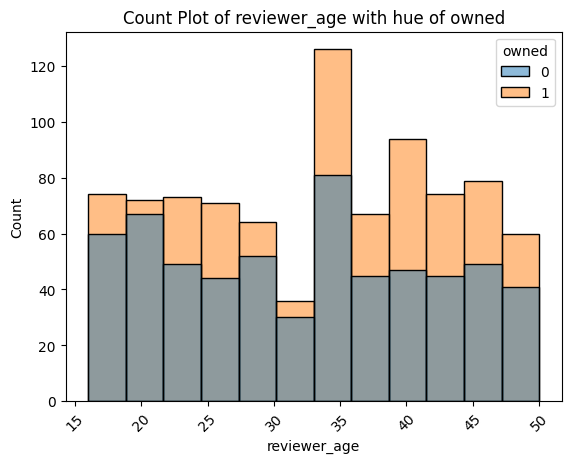

In [26]:
hist_plot(df, 'reviewer_age', 'owned')

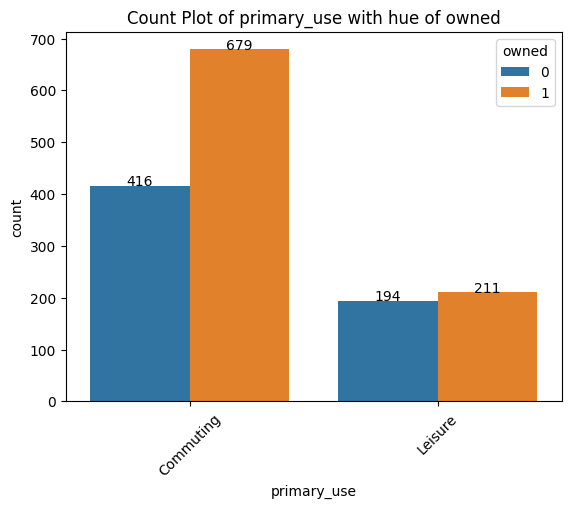

In [27]:
count_plot(df, 'primary_use', 'owned')

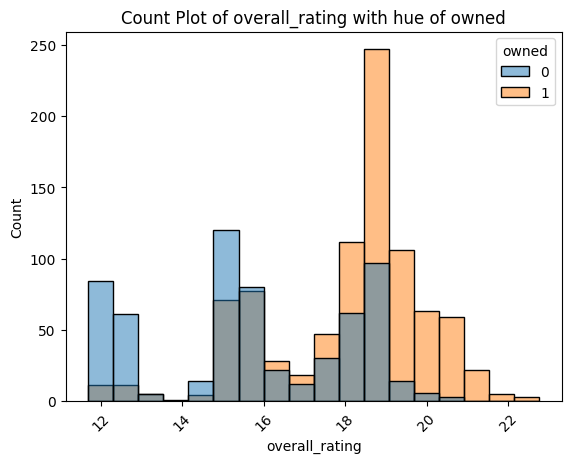

In [28]:
hist_plot(df, 'overall_rating', 'owned')

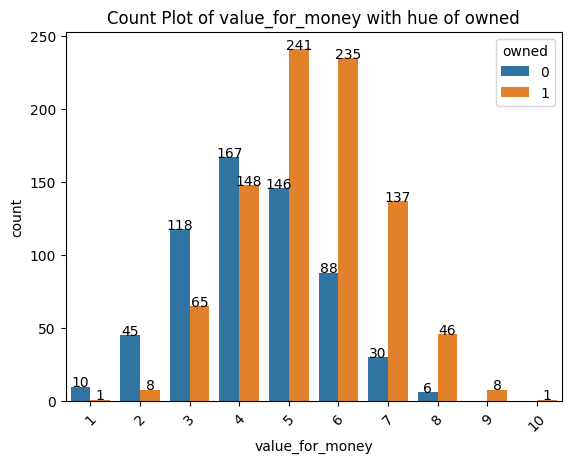

In [29]:
count_plot(df, 'value_for_money', 'owned')

## Task 3
The distribution of overall rating is not normal, have multiple peak and skewed to the left.

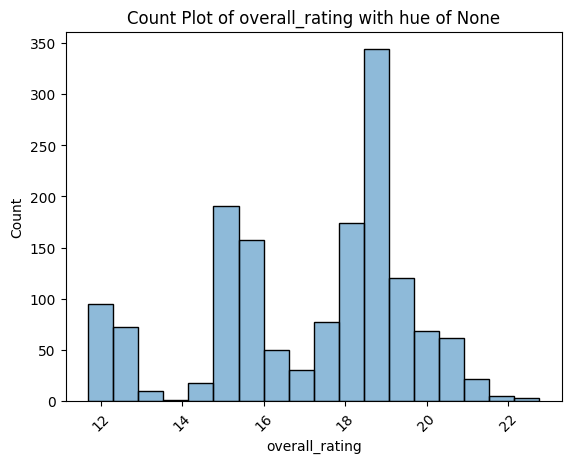

In [30]:
hist_plot(df, 'overall_rating')

## Task 4
Reviewer who gave higher rating tend to owned the moped.

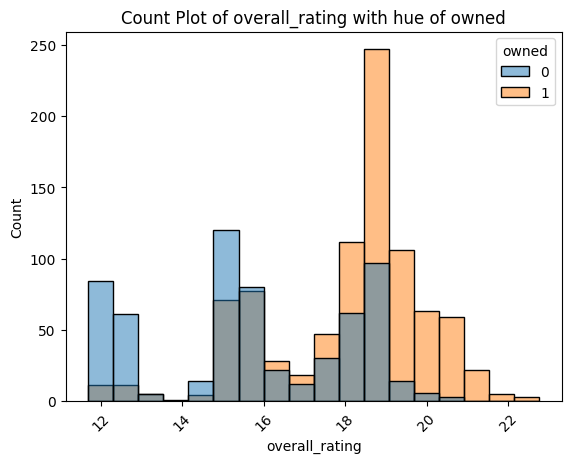

In [31]:
hist_plot(df, 'overall_rating', hue='owned')

## Task 5
Since the business wants to predict whether the review come from owner or not owner (binary output), this is classification problem.

## Task 6
I'll use logistic regression as the baseline model since it's simple.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [42]:
df_classification = df.copy()

#Label encoding and One Hot encoding

for i in df_classification.columns:
    if df_classification[i].dtype == 'object':
        if df_classification[i].nunique() == 2:
            df_classification[i] = df_classification[i].astype('category')
            df_classification[i] = df_classification[i].cat.codes
            df_classification[i] = df_classification[i].astype(int)
        else:
            dum_df = pd.get_dummies(df_classification[i], prefix=[i], drop_first='True')
            df_classification.drop(columns=i, inplace=True)
            df_classification = df_classification.merge(dum_df, left_index=True, right_index=True)

#Assign data to X and y
X = df_classification.iloc[:,1:]
y = df_classification.iloc[:,0]

#Define KFold
kf = KFold(n_splits=10, shuffle=True, random_state=10)

#Define Scaler
ss = StandardScaler()

#Define Baseline Model - LogisticRegression
lr = LogisticRegression(random_state=10)

#Define Feature Selection Method - RFECV
rfecv = RFECV(estimator = lr, cv=kf)

#Create Pipeline with StandardScaler, RFECV and LogisticRegression
pipe = Pipeline([
      ('ss', ss),
      ('rfecv', rfecv),
      ('lr', lr)
])

cv_score = cross_val_score(pipe, X, y, cv=kf, scoring='accuracy')
print(np.mean(cv_score), np.std(cv_score))

0.752 0.032768548606518705


## Task 7
I'll use GradientBoostingClassifier for model comparison

In [49]:
#Define Comparison Model - GradientBoostingClassifier
gbclassifier = GradientBoostingClassifier(random_state=10)

#Define Feature Selection Method - RFECV
rfecv = RFECV(estimator = gbclassifier, cv=kf)

#Create Pipeline with StandardScaler, RFECV and GradientBoostingClassifier
pipe_gb = Pipeline([
      ('ss', ss),
      ('rfecv', rfecv),
      ('gbclassifier', gbclassifier)
])

#Define hyperparameter to tune
param_grid = [{'rfecv__steps': [1]},
              {'gbclassifier__n_estimators': np.arange(50, 550, 50),
               'gbclassifier__learning_rate': np.arange(0.01, 0.21, 0.01),
               'gbclassifier__max_depth': np.arange(3, 9, 1)
             }]
                
random_search = RandomizedSearchCV(pipe_gb, param_grid, cv=kf, scoring='accuracy', random_state=10, n_jobs=-1)
random_search.fit(X,y)
print(random_search.best_score_)

0.728


## Task 8
Reason why I choose Logistic Regression is because it's simple, fast and performs best on small dataset with small number of feature, especially if there is linear relationship in the data. Gradient Boosting is chosen as the model comparison because the model can capture complex relationship in data and performs well in skewed data, however, gradient boosting is slow.

## Task 9

In [50]:
#Logistic Regression
cv_score = cross_val_score(pipe, X, y, cv=kf, scoring='accuracy')
print(np.mean(cv_score))

0.752


In [51]:
#Gradient Boosting Classifier
print(random_search.best_score_)

0.728


## Task 10
Based on the accuracy, logistic regression is better than gradient boosting classifier in this case.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam